In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

In [2]:
def load_pamap_results(file_path):
    """Load PAMAP PID results from numpy file."""
    try:
        data = np.load(file_path, allow_pickle=True)
        print(f"Successfully loaded {len(data)} modality pairs from {file_path}")
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def plot_pamap_time_lag_rus(data, save_dir=None, figsize=(15, 12)):
    """
    Plot time-lag RUS figures for all modality pairs from PAMAP data.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Loaded PAMAP results data
    save_dir : str, optional
        Directory to save plots
    figsize : tuple
        Figure size for each subplot
    """
    if data is None:
        print("No data to plot")
        return
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # Create figure with subplots for each modality pair
    n_pairs = len(data)
    n_cols = min(3, n_pairs)
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows / 2))
    if n_pairs == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Define colors for each RUS component
    colors = {
        'R': '#1f77b4',    # Blue - Redundancy
        'U1': '#ff7f0e',   # Orange - Unique X1
        'U2': '#2ca02c',   # Green - Unique X2
        'S': '#d62728'     # Red - Synergy
    }
    
    # Define labels
    labels = {
        'R': 'Redundancy',
        'U1': 'Unique X1',
        'U2': 'Unique X2', 
        'S': 'Synergy'
    }
    
    for idx, pair_data in enumerate(data):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # Extract modality pair info
        mod1, mod2 = pair_data['feature_pair']
        n_features_mod1 = pair_data['n_features_mod1']
        n_features_mod2 = pair_data['n_features_mod2']
        
        # Extract lag results
        lag_results = pair_data['lag_results']
        
        # Prepare data for plotting
        lags = [result['lag'] for result in lag_results]
        r_values = [result['R_value'] for result in lag_results]
        u1_values = [result['U1_value'] for result in lag_results]
        u2_values = [result['U2_value'] for result in lag_results]
        s_values = [result['S_value'] for result in lag_results]
        
        # Plot each RUS component
        ax.plot(lags, r_values, 'o-', color=colors['R'], label=labels['R'], linewidth=2, markersize=6)
        ax.plot(lags, u1_values, 's-', color=colors['U1'], label=labels['U1'], linewidth=2, markersize=6)
        ax.plot(lags, u2_values, '^-', color=colors['U2'], label=labels['U2'], linewidth=2, markersize=6)
        ax.plot(lags, s_values, 'd-', color=colors['S'], label=labels['S'], linewidth=2, markersize=6)
        
        # Customize subplot
        ax.set_xlabel('Time Lag', fontsize=12)
        ax.set_ylabel('Information (bits)', fontsize=12)
        ax.set_title(f'{mod1} vs {mod2}\n({n_features_mod1} vs {n_features_mod2} features)', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        
        # Set y-axis to start from 0
        ax.set_ylim(bottom=0)
        
        # Set integer ticks for x-axis
        ax.set_xticks(lags)
    
    # Remove empty subplots
    if n_pairs < n_rows * n_cols:
        for idx in range(n_pairs, n_rows * n_cols):
            row = idx // n_cols
            col = idx % n_cols
            if n_rows > 1:
                fig.delaxes(axes[row, col])
            else:
                fig.delaxes(axes[col])
    
    plt.tight_layout()
    # plt.suptitle('Time-Lag RUS Analysis: PAMAP2 Multimodal Activity Recognition', 
    #              fontsize=16, fontweight='bold', y=0.98)
    
    # Save plot if directory specified
    if save_dir:
        save_path = Path(save_dir) / 'pamap_time_lag_rus_all_pairs.png'
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    plt.show()

def plot_pamap_normalized_rus(data, save_dir=None, figsize=(15, 12)):
    """
    Plot normalized RUS components (percentages) for all modality pairs.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Loaded PAMAP results data
    save_dir : str, optional
        Directory to save plots
    figsize : tuple
        Figure size for each subplot
    """
    if data is None:
        print("No data to plot")
        return
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # Create figure with subplots for each modality pair
    n_pairs = len(data)
    n_cols = min(3, n_pairs)
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows / 2))
    if n_pairs == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Define colors for each RUS component
    colors = {
        'R': '#1f77b4',    # Blue - Redundancy
        'U1': '#ff7f0e',   # Orange - Unique X1
        'U2': '#2ca02c',   # Green - Unique X2
        'S': '#d62728'     # Red - Synergy
    }
    
    # Define labels
    labels = {
        'R': 'Redundancy',
        'U1': 'Unique X1',
        'U2': 'Unique X2', 
        'S': 'Synergy'
    }
    
    for idx, pair_data in enumerate(data):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # Extract modality pair info
        mod1, mod2 = pair_data['feature_pair']
        n_features_mod1 = pair_data['n_features_mod1']
        n_features_mod2 = pair_data['n_features_mod2']
        
        # Extract lag results
        lag_results = pair_data['lag_results']
        
        # Prepare normalized data for plotting
        lags = [result['lag'] for result in lag_results]
        r_norm = [result['R_norm'] * 100 for result in lag_results]  # Convert to percentage
        u1_norm = [result['U1_norm'] * 100 for result in lag_results]
        u2_norm = [result['U2_norm'] * 100 for result in lag_results]
        s_norm = [result['S_norm'] * 100 for result in lag_results]
        
        # Plot each normalized RUS component
        ax.plot(lags, r_norm, 'o-', color=colors['R'], label=labels['R'], linewidth=2, markersize=6)
        ax.plot(lags, u1_norm, 's-', color=colors['U1'], label=labels['U1'], linewidth=2, markersize=6)
        ax.plot(lags, u2_norm, '^-', color=colors['U2'], label=labels['U2'], linewidth=2, markersize=6)
        ax.plot(lags, s_norm, 'd-', color=colors['S'], label=labels['S'], linewidth=2, markersize=6)
        
        # Customize subplot
        ax.set_xlabel('Time Lag', fontsize=12)
        ax.set_ylabel('Normalized Information (%)', fontsize=12)
        ax.set_title(f'{mod1} vs {mod2}\n({n_features_mod1} vs {n_features_mod2} features)', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        
        # Set y-axis limits
        ax.set_ylim(0, 100)
        
        # Set integer ticks for x-axis
        ax.set_xticks(lags)
    
    # Remove empty subplots
    if n_pairs < n_rows * n_cols:
        for idx in range(n_pairs, n_rows * n_cols):
            row = idx // n_cols
            col = idx % n_cols
            if n_rows > 1:
                fig.delaxes(axes[row, col])
            else:
                fig.delaxes(axes[col])
    
    plt.tight_layout()
    plt.suptitle('Normalized Time-Lag RUS Analysis: PAMAP2 Multimodal Activity Recognition', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Save plot if directory specified
    if save_dir:
        save_path = Path(save_dir) / 'pamap_normalized_time_lag_rus_all_pairs.png'
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    plt.show()

def summarize_pamap_results(data):
    """
    Print a summary of the PAMAP results.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Loaded PAMAP results data
    """
    if data is None:
        print("No data to summarize")
        return
    
    print("=" * 60)
    print("PAMAP2 Multimodal RUS Analysis Summary")
    print("=" * 60)
    print(f"Total modality pairs analyzed: {len(data)}")
    print()
    
    for idx, pair_data in enumerate(data):
        mod1, mod2 = pair_data['feature_pair']
        n_features_mod1 = pair_data['n_features_mod1']
        n_features_mod2 = pair_data['n_features_mod2']
        avg_metrics = pair_data['avg_metrics']
        n_lags = len(pair_data['lag_results'])
        
        print(f"Pair {idx + 1}: {mod1} vs {mod2}")
        print(f"  Features: {n_features_mod1} vs {n_features_mod2}")
        print(f"  Lags analyzed: {n_lags}")
        print(f"  Average metrics across all lags:")
        print(f"    Redundancy: {avg_metrics['R_value']:.4f} bits ({avg_metrics['R_norm']*100:.1f}%)")
        print(f"    Unique X1:  {avg_metrics['U1_value']:.4f} bits ({avg_metrics['U1_norm']*100:.1f}%)")
        print(f"    Unique X2:  {avg_metrics['U2_value']:.4f} bits ({avg_metrics['U2_norm']*100:.1f}%)")
        print(f"    Synergy:    {avg_metrics['S_value']:.4f} bits ({avg_metrics['S_norm']*100:.1f}%)")
        print(f"    Total MI:   {avg_metrics['MI_value']:.4f} bits")
        print()

Successfully loaded 6 modality pairs from /cis/home/xhan56/code/dami/results/pamap/pamap_subject3_multimodal_all_lag10_bins4.npy
PAMAP2 Multimodal RUS Analysis Summary
Total modality pairs analyzed: 6

Pair 1: chest vs hand
  Features: 13 vs 13
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 2.0282 bits (77.1%)
    Unique X1:  0.2764 bits (10.5%)
    Unique X2:  0.2329 bits (8.9%)
    Synergy:    0.0915 bits (3.5%)
    Total MI:   2.6290 bits

Pair 2: chest vs ankle
  Features: 13 vs 13
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 0.0000 bits (0.0%)
    Unique X1:  0.0000 bits (0.0%)
    Unique X2:  0.2694 bits (76.7%)
    Synergy:    0.0825 bits (23.3%)
    Total MI:   0.3519 bits

Pair 3: chest vs heart_rate
  Features: 13 vs 1
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 0.1973 bits (7.7%)
    Unique X1:  2.1379 bits (83.4%)
    Unique X2:  0.0017 bits (0.1%)
    Synergy:    0.2258 bits (8.8%)
    Total MI:  

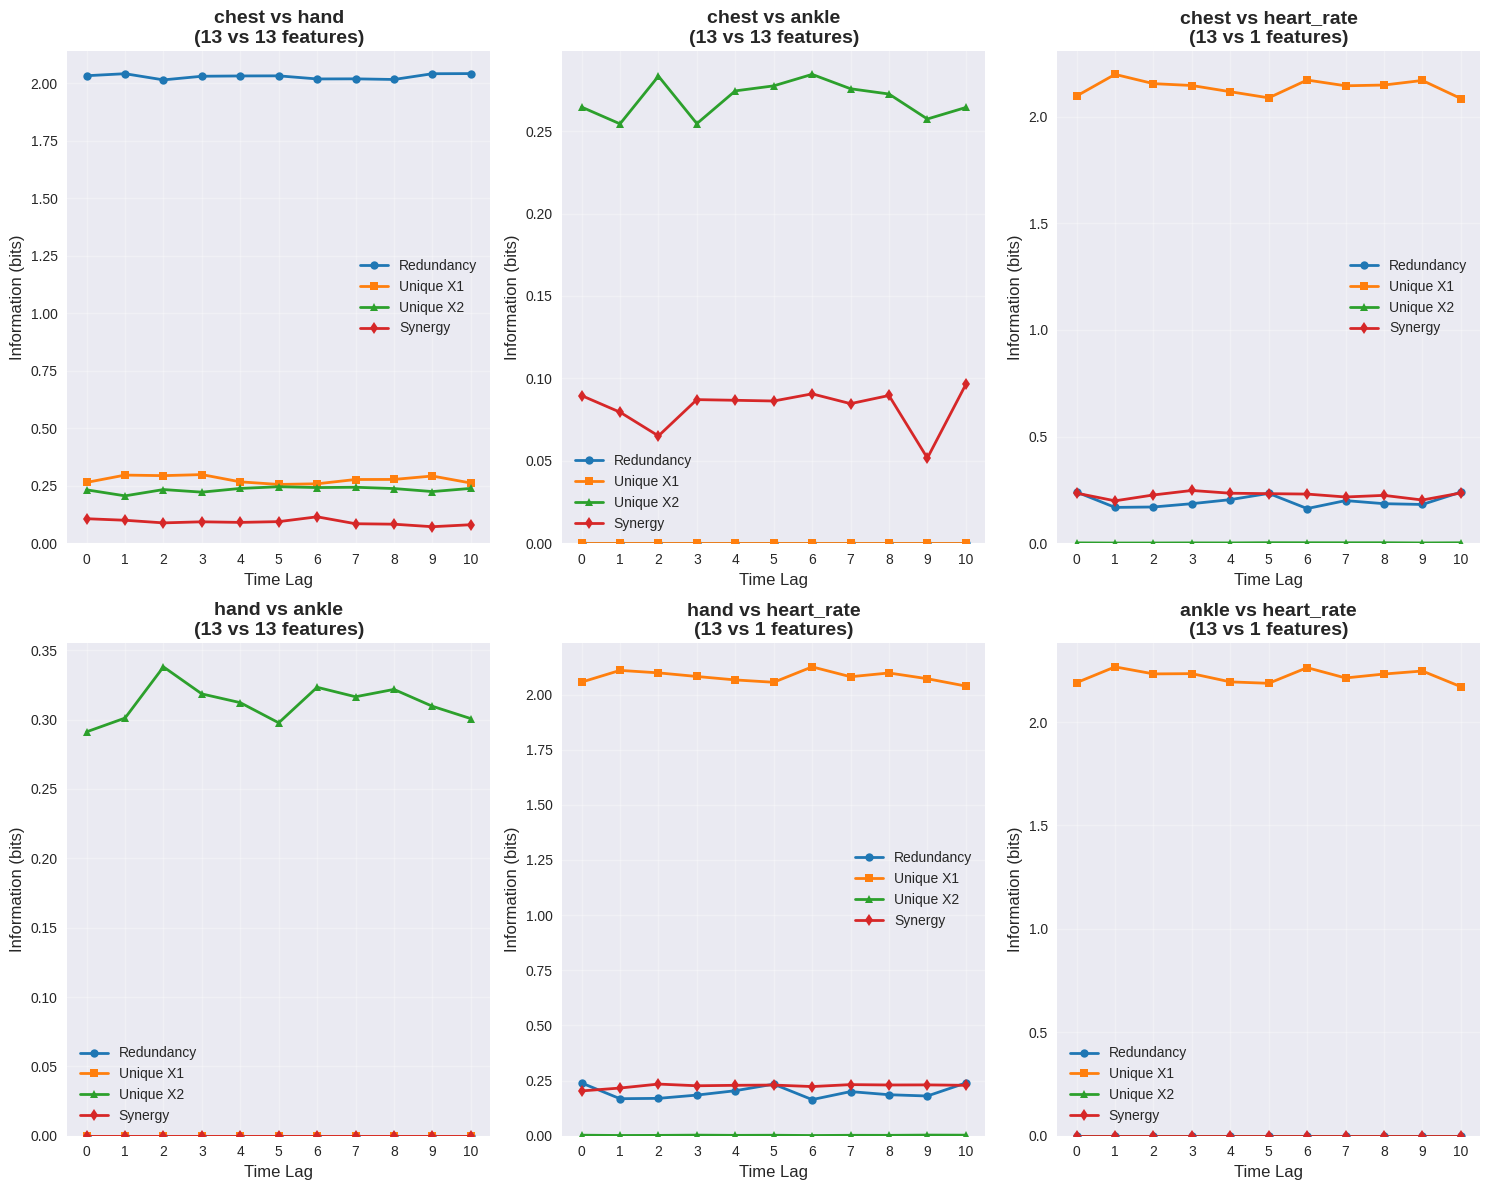

In [3]:
# Load and analyze PAMAP data
data_file = "/cis/home/xhan56/code/dami/results/pamap/pamap_subject3_multimodal_all_lag10_bins4.npy"
pamap_data = load_pamap_results(data_file)

summarize_pamap_results(pamap_data)

# Create plots
plot_pamap_time_lag_rus(pamap_data)
# plot_pamap_normalized_rus(pamap_data, save_dir="/cis/home/xhan56/code/dami/results/pamap")

Successfully loaded 6 modality pairs from /cis/home/xhan56/code/dami/results/pamap/pamap_subject1_multimodal_all_lag10_bins4.npy
PAMAP2 Multimodal RUS Analysis Summary
Total modality pairs analyzed: 6

Pair 1: chest vs hand
  Features: 13 vs 13
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 1.7355 bits (58.0%)
    Unique X1:  0.5015 bits (31.9%)
    Unique X2:  0.3018 bits (10.1%)
    Synergy:    0.0014 bits (0.0%)
    Total MI:   2.5402 bits

Pair 2: chest vs ankle
  Features: 13 vs 13
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 1.2276 bits (40.9%)
    Unique X1:  0.2666 bits (23.1%)
    Unique X2:  0.3007 bits (33.4%)
    Synergy:    0.0188 bits (2.7%)
    Total MI:   1.8136 bits

Pair 3: chest vs heart_rate
  Features: 13 vs 1
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 0.0167 bits (0.6%)
    Unique X1:  2.5660 bits (91.6%)
    Unique X2:  0.0001 bits (0.0%)
    Synergy:    0.2194 bits (7.8%)
    Total MI:

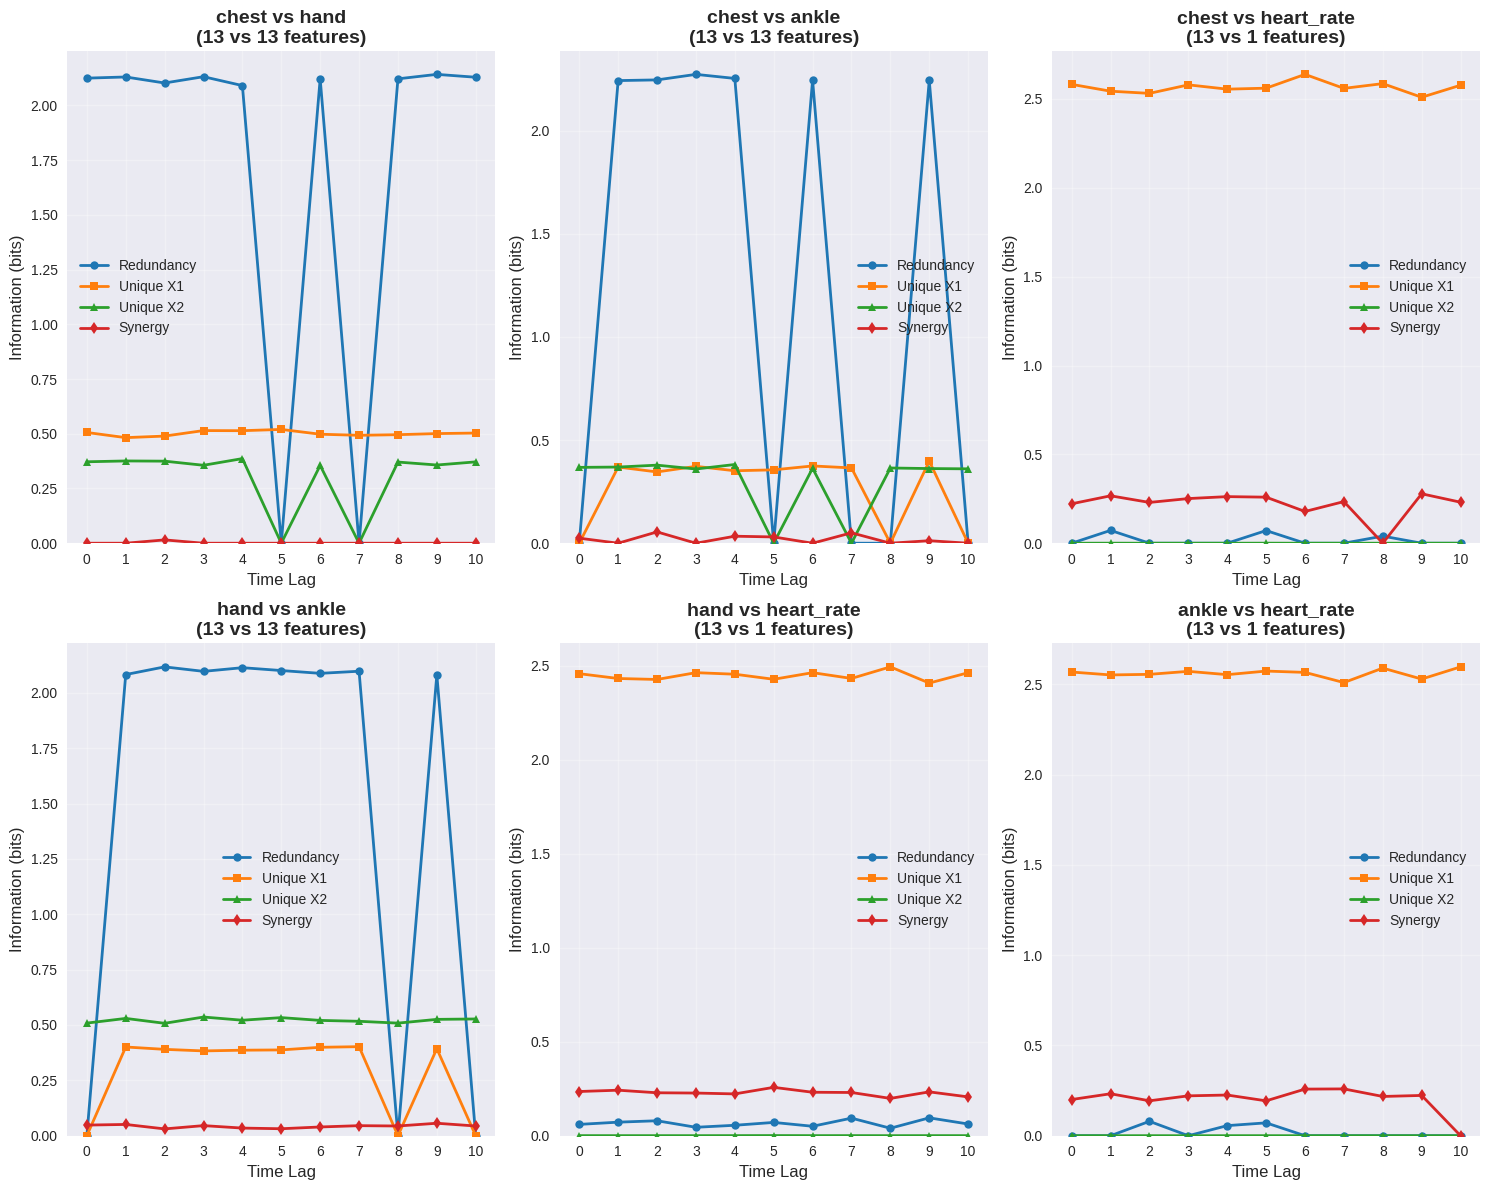

In [12]:
data_file = "/cis/home/xhan56/code/dami/results/pamap/pamap_subject1_multimodal_all_lag10_bins4.npy"
pamap_data = load_pamap_results(data_file)

summarize_pamap_results(pamap_data)
plot_pamap_time_lag_rus(pamap_data)

Successfully loaded 6 modality pairs from /cis/home/xhan56/code/dami/results/pamap/pamap_subject2_multimodal_all_lag10_bins4.npy
PAMAP2 Multimodal RUS Analysis Summary
Total modality pairs analyzed: 6

Pair 1: chest vs hand
  Features: 13 vs 13
  Lags analyzed: 10
  Average metrics across all lags:
    Redundancy: 1.0996 bits (37.9%)
    Unique X1:  0.1573 bits (5.4%)
    Unique X2:  0.3773 bits (56.5%)
    Synergy:    0.0023 bits (0.2%)
    Total MI:   1.6365 bits

Pair 2: chest vs ankle
  Features: 13 vs 13
  Lags analyzed: 10
  Average metrics across all lags:
    Redundancy: 0.0000 bits (0.0%)
    Unique X1:  0.0000 bits (0.0%)
    Unique X2:  0.2802 bits (100.0%)
    Synergy:    0.0000 bits (0.0%)
    Total MI:   0.2802 bits

Pair 3: chest vs heart_rate
  Features: 13 vs 1
  Lags analyzed: 11
  Average metrics across all lags:
    Redundancy: 0.0488 bits (1.8%)
    Unique X1:  2.4336 bits (89.1%)
    Unique X2:  0.0002 bits (0.0%)
    Synergy:    0.2508 bits (9.1%)
    Total MI:  

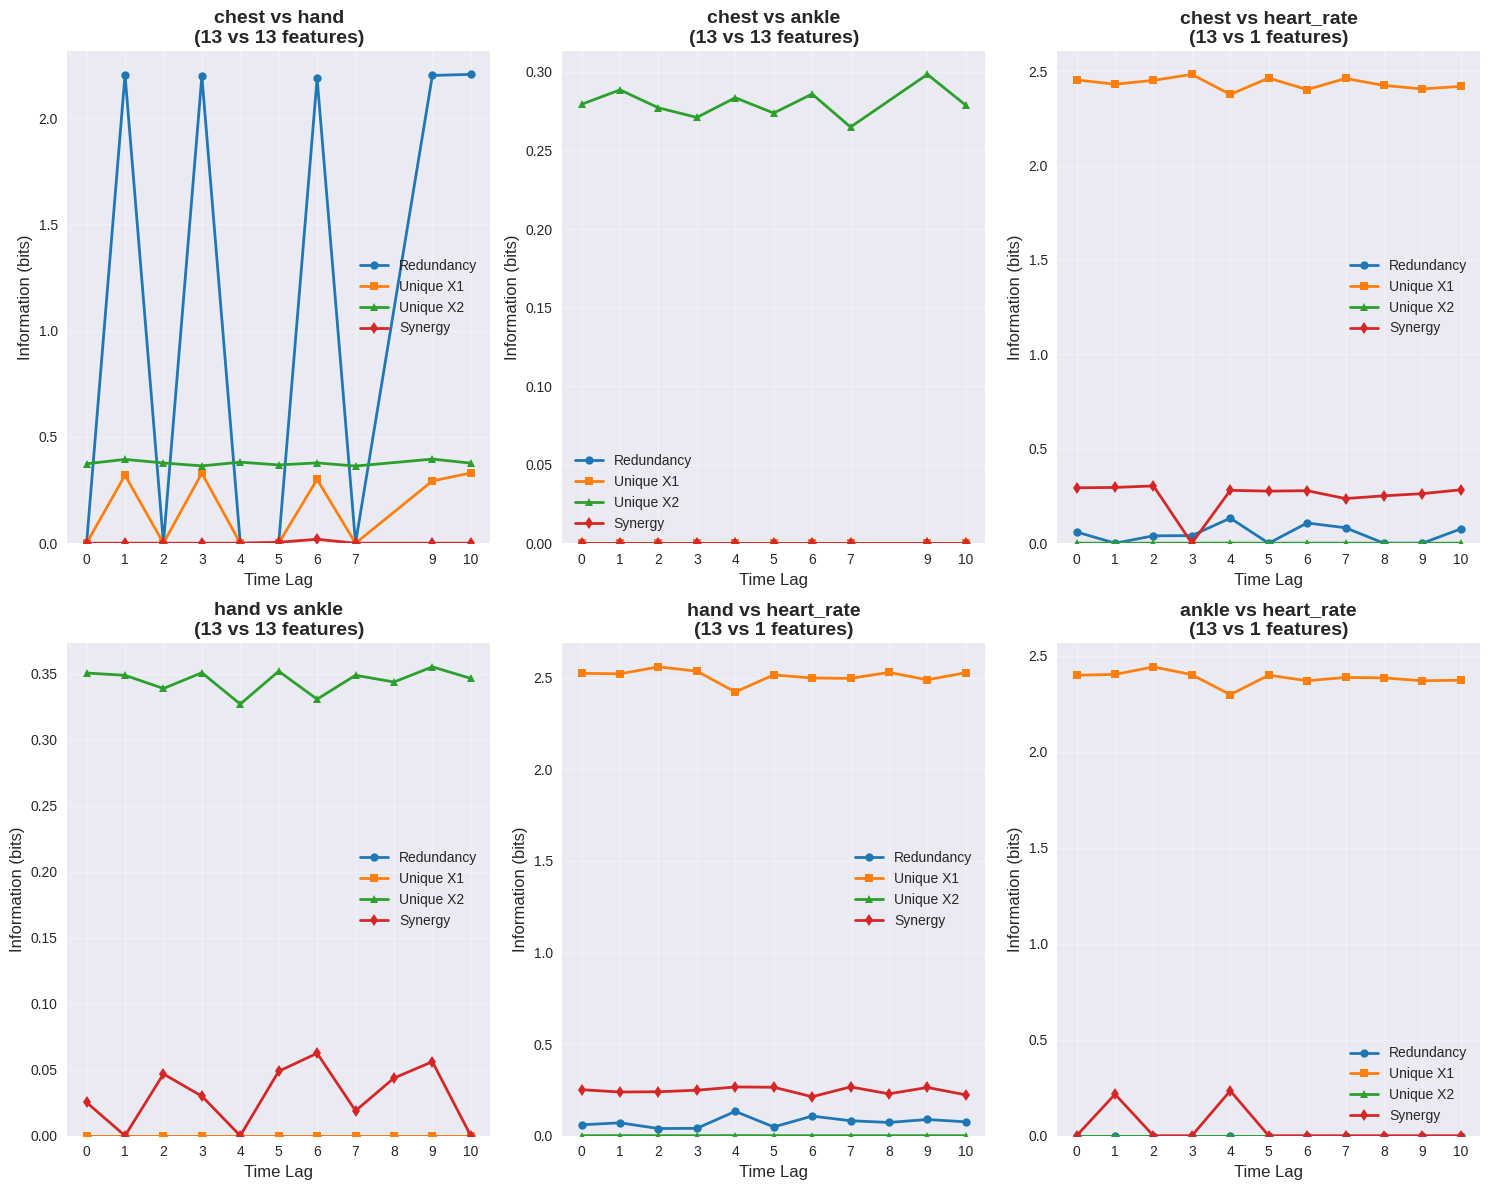

In [13]:
data_file = "/cis/home/xhan56/code/dami/results/pamap/pamap_subject2_multimodal_all_lag10_bins4.npy"
pamap_data = load_pamap_results(data_file)

summarize_pamap_results(pamap_data)
plot_pamap_time_lag_rus(pamap_data)